## fkit Tutorial Notebook

Welcome to the fkit quickstart notebook! Please refer to the GitHub README doc for further guidance

In [1]:
import fkit

## Step 1: Define Fibers

In [2]:
# define fibers
fiber_concrete = fkit.patchfiber.Hognestad(fpc=4, take_tension=True)
fiber_steel    = fkit.nodefiber.Bilinear(fy=60, Es=29000)

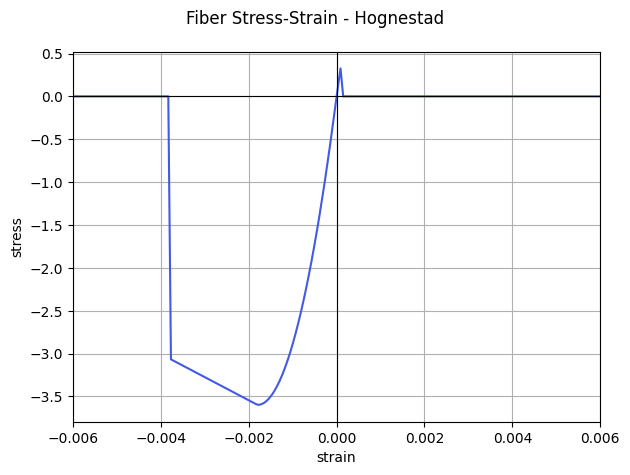

In [3]:
# preview fiber material property definition
fig = fkit.plotter.preview_fiber(fiber_concrete, x_limit=[-0.006, 0.006])

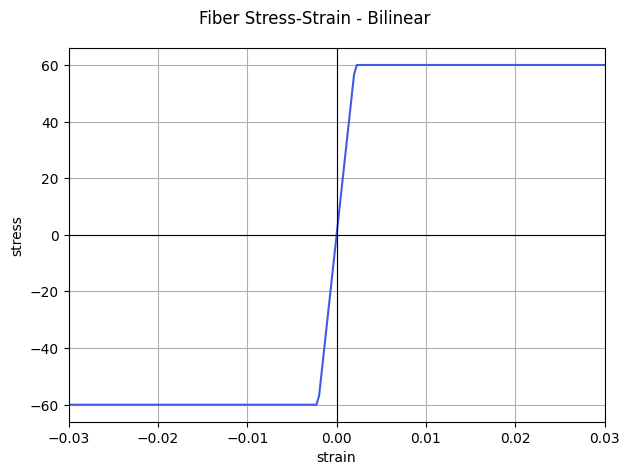

In [4]:
fig = fkit.plotter.preview_fiber(fiber_steel)

In [5]:
# if you need any help, remember you may access the docstring of any method using help() or ?
help(fkit.patchfiber.Hognestad)

Help on class Hognestad in module fkit.patchfiber:

class Hognestad(BasePatchFiber)
 |  Hognestad(fpc, Ec='default', eo='default', emax=0.0038, alpha=0, take_tension=False, fr='default', er='default', default_color='lightgray', vertices=None)
 |
 |  Modified Hognestad model based on Hognestad et al (1951). See Macgregor & Wight Textbook Ch 3.5
 |
 |  Input parameters: (ALL POSITIVE)
 |      fpc             concrete cylinder strength
 |                          - Peak stress will occur at 0.9fpc
 |                          - (ref A) 10% reduction accounts for difference between cylinder strength and member strength
 |
 |      Ec              (OPTIONAL) modulus of elasticity
 |                          - Automatically calculated if not specified. Unit is inferred:
 |                          - If fpc < 15 (unit ksi): Default = 57000 * sqrt(fpc*1000)/1000
 |                          - If fpc > 15 (unit MPa): Default = 4700 * sqrt(fpc)
 |
 |      eo              (OPTIONAL) strain at peak s

## Step 2: Define Section

In [6]:
# create a rectangular beam section with SectionBuilder
section1 = fkit.sectionbuilder.rectangular(width = 18, 
                                           height = 24, 
                                           cover = 2, 
                                           top_bar = [0.6, 4, 1, 0], 
                                           bot_bar = [0.6, 4, 2, 3],  
                                           concrete_fiber = fiber_concrete, 
                                           steel_fiber = fiber_steel)

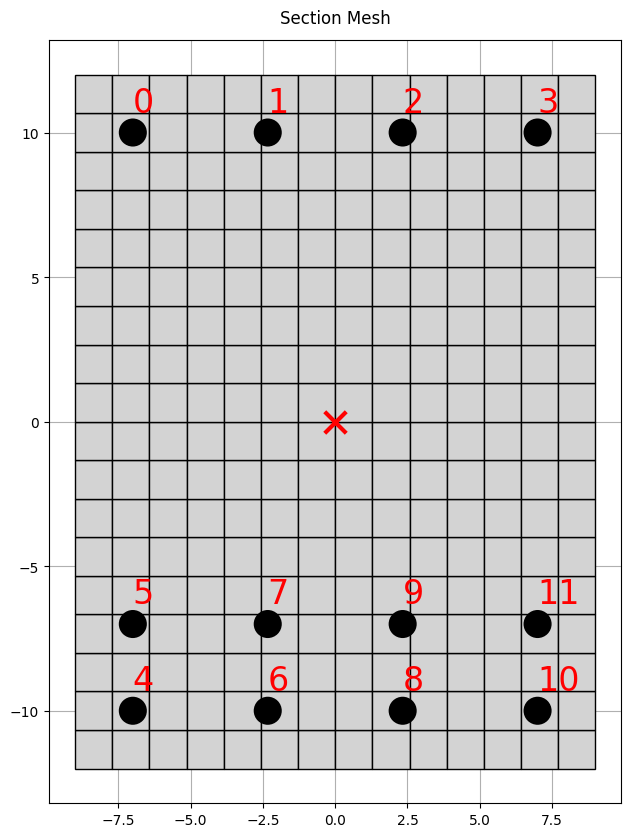

In [7]:
# preview section
fig = fkit.plotter.preview_section(section1, show_tag=True)

In [8]:
# here is the same section above constructed manually without sectionBuilder
section2 = fkit.Section()
section2.add_patch(xo=0, yo=0, b=18 ,h=24, nx=15, ny=15, fiber=fiber_concrete)
section2.add_bar_group(xo=2, yo=2, b=14, h=3, nx=4, ny=2, area=0.6, perimeter_only=True, fiber=fiber_steel)
section2.add_bar_group(xo=2, yo=22, b=14, h=1, nx=4, ny=1, area=0.6, perimeter_only=True, fiber=fiber_steel)
section2.mesh()

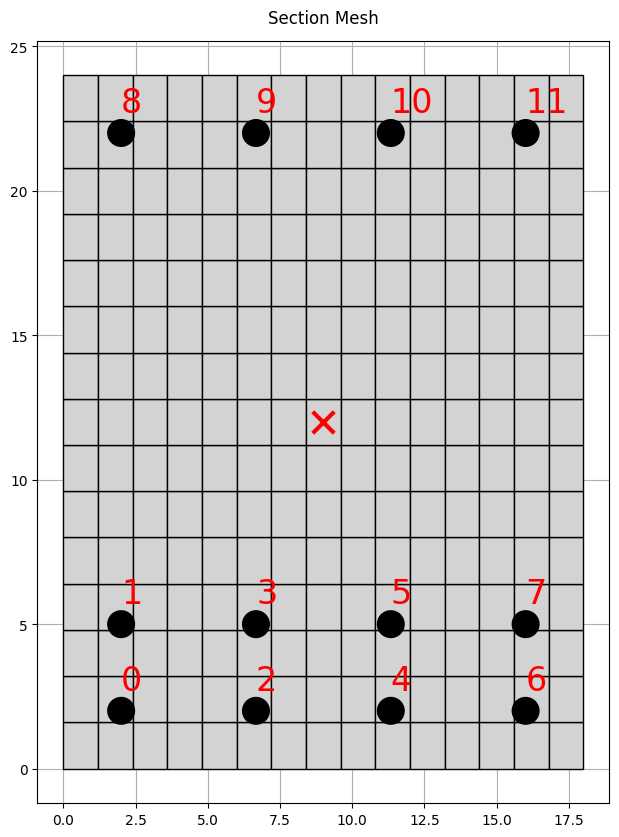

In [9]:
fig = fkit.plotter.preview_section(section2, show_tag=True)

## Step 3: Moment Curvature Analysis 

In [10]:
# Estimate yield curvature which will be our target
depth = 24
phi_yield_approximate = 0.003 / (0.25*depth)

In [11]:
# start moment curvature analysis
MK_results = section1.run_moment_curvature(phi_target = phi_yield_approximate)

Moment-curvature analysis completed. Elapsed time: 0.55 seconds



In [12]:
# calculate cracked moment of inertia
Icr_results = section1.calculate_Icr(Es=29000, Ec=4030)

In [ ]:
# extract all fiber data
df_nodefibers, df_patchfibers = section2.get_all_fiber_data()

# extract data of a specific fiber
fiber_data        = section2.get_patch_fiber_data(location=[0.0, 8.25])
fiber_data_top    = section2.get_patch_fiber_data(location="top")
fiber_data_bottom = section2.get_patch_fiber_data(location="bottom")
fiber_data_rebar3 = section2.get_node_fiber_data(tag=3)

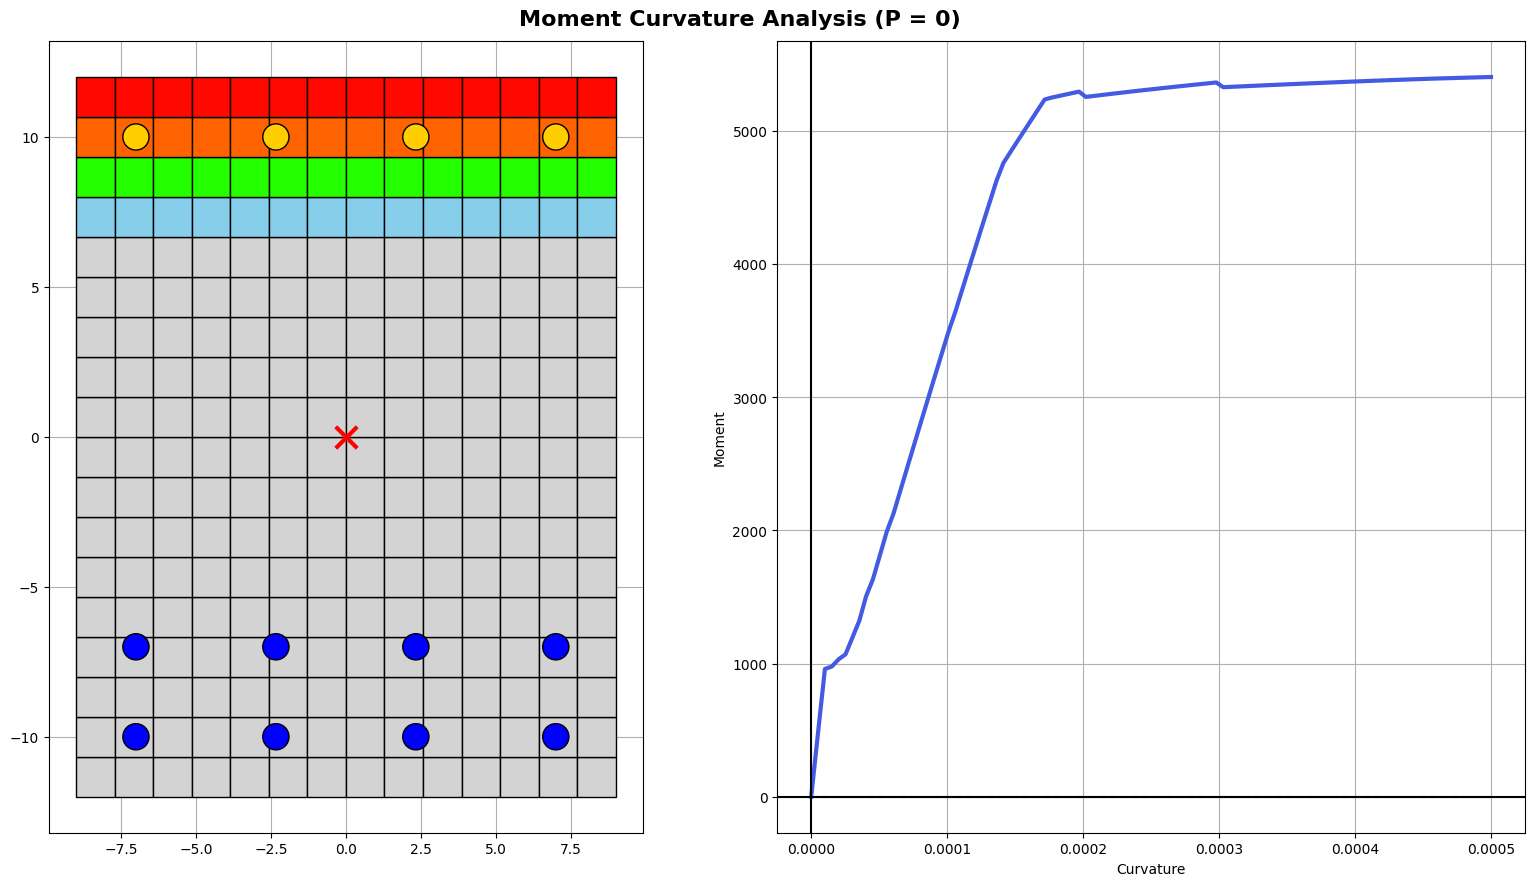

In [14]:
fig = fkit.plotter.plot_MK(section1)

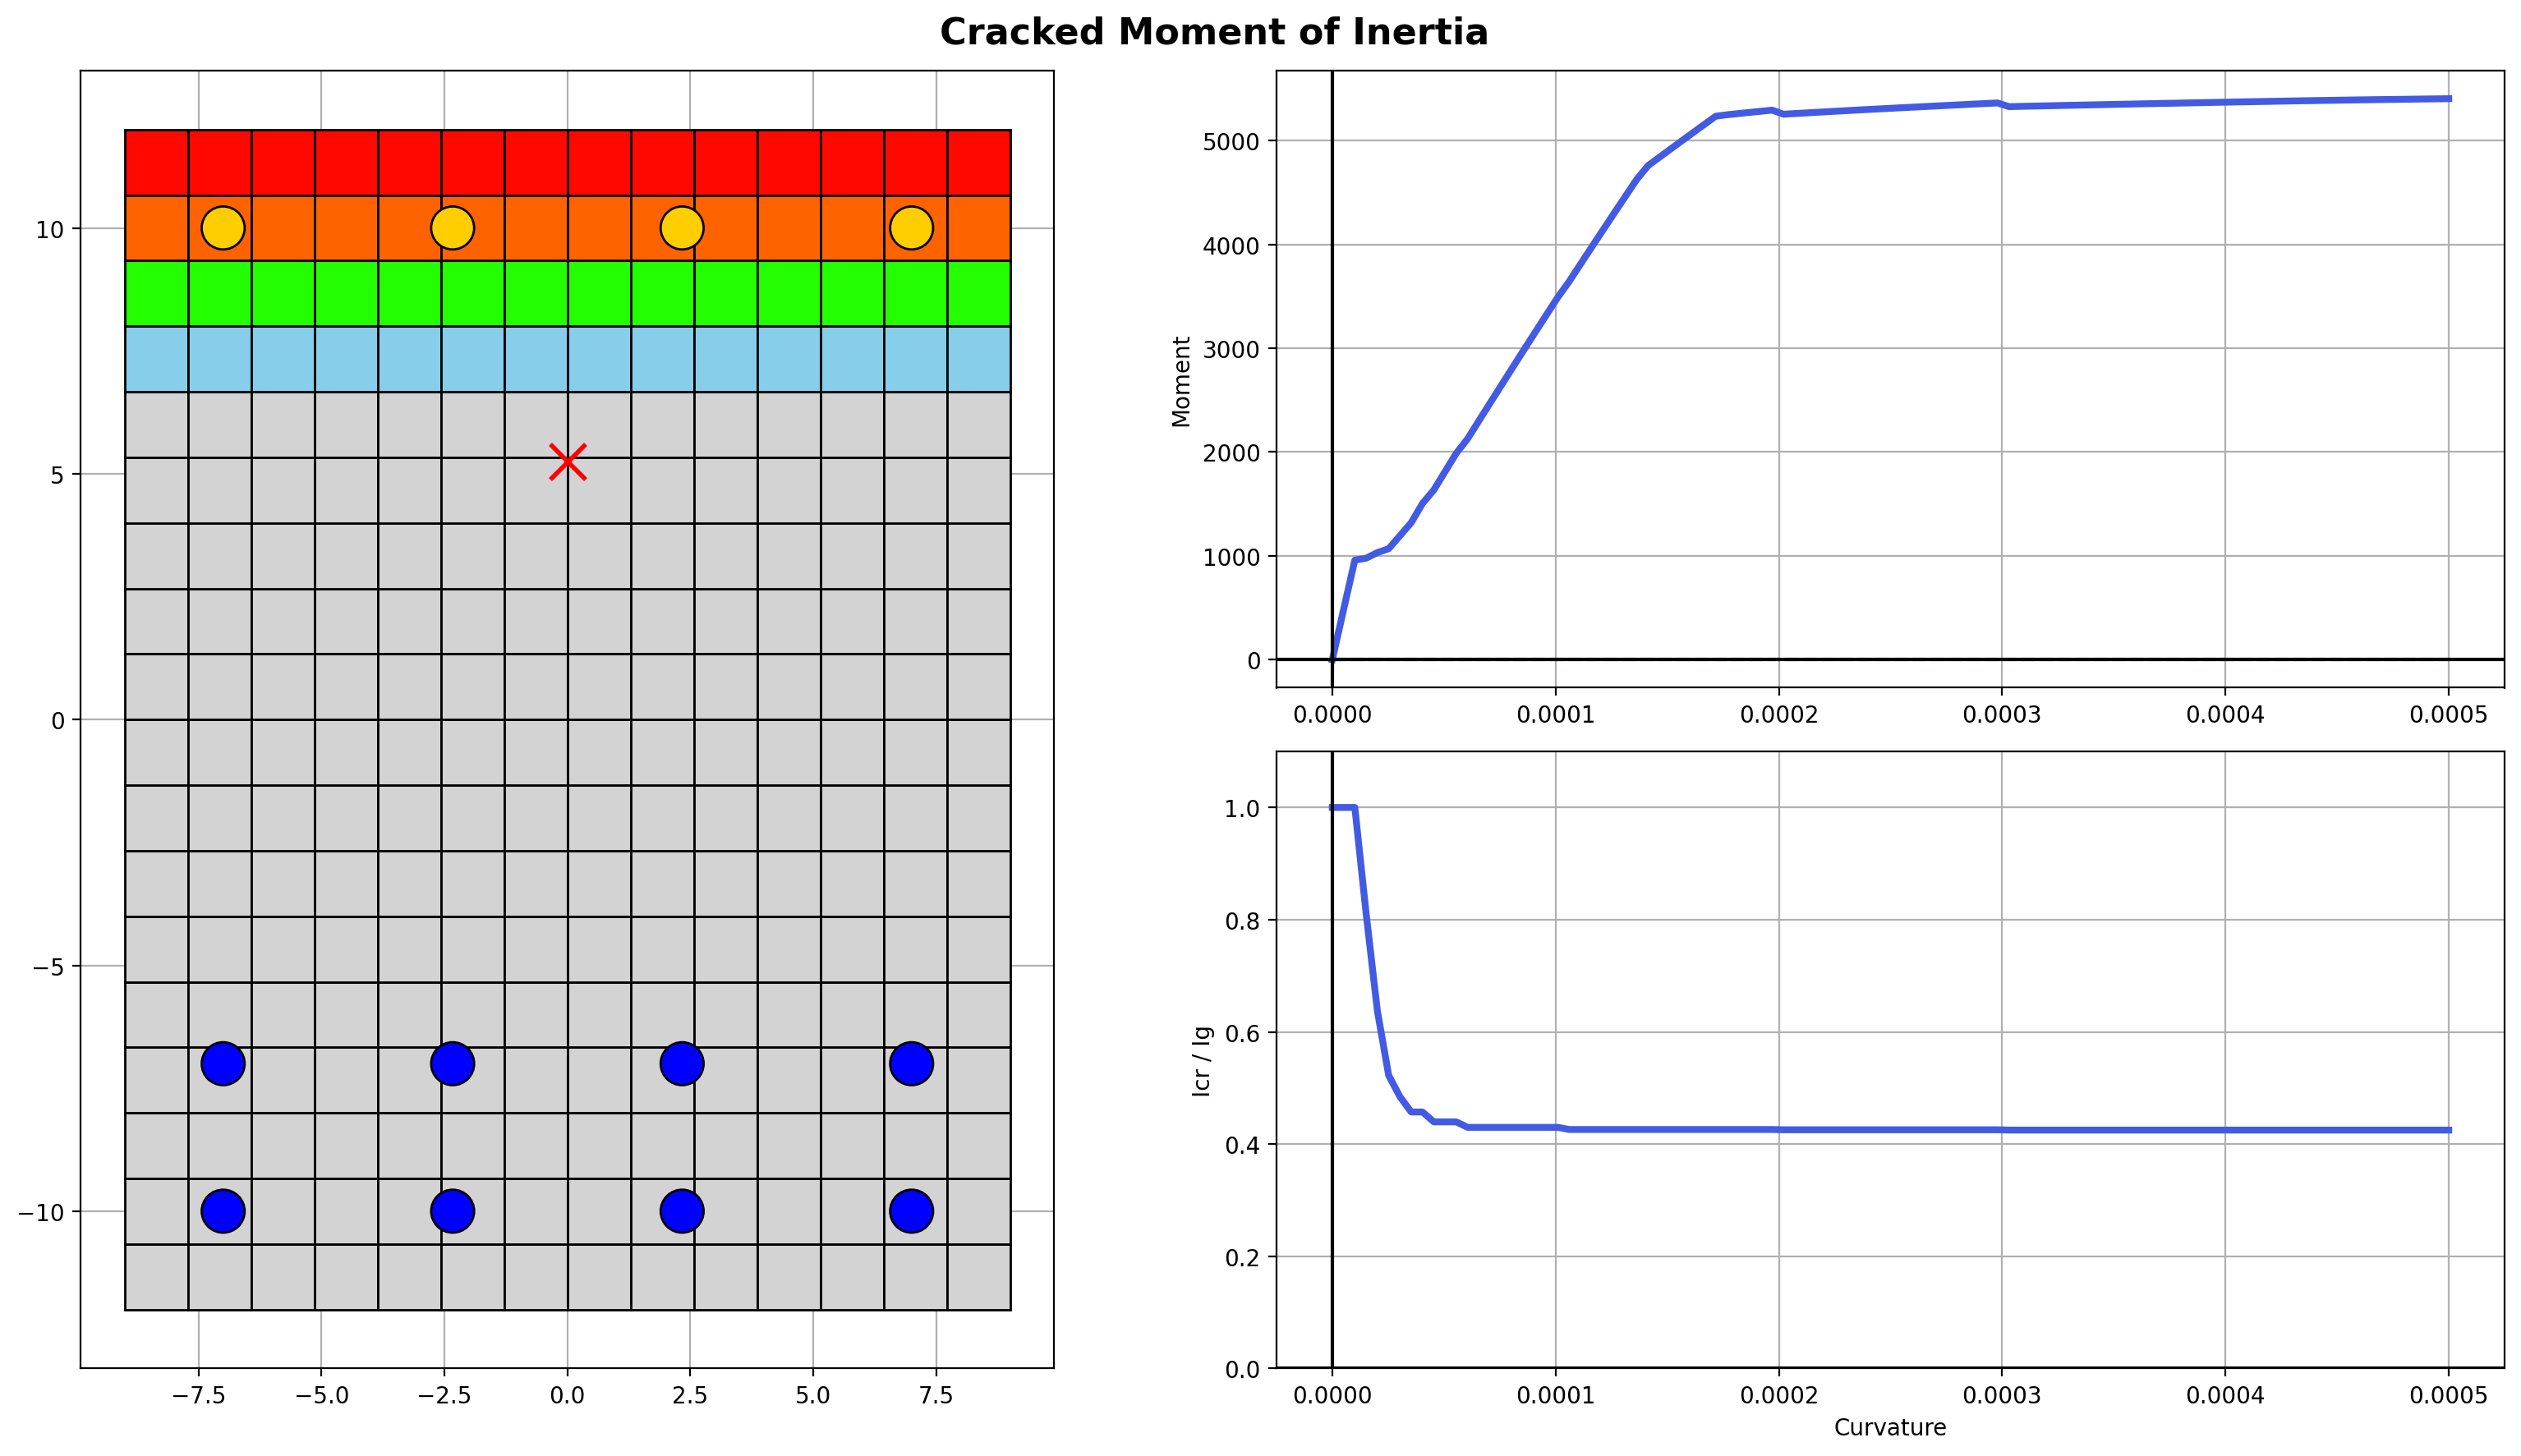

In [15]:
fig = fkit.plotter.plot_Icr(section1)

## Step 4: PM Interaction Analysis

In [16]:
# start PM interaction
PM_results = section1.run_PM_interaction(fpc=4, fy=60, Es=29000)

PM interaction analysis per ACI 318 completed. Elapsed time: 0.04 seconds



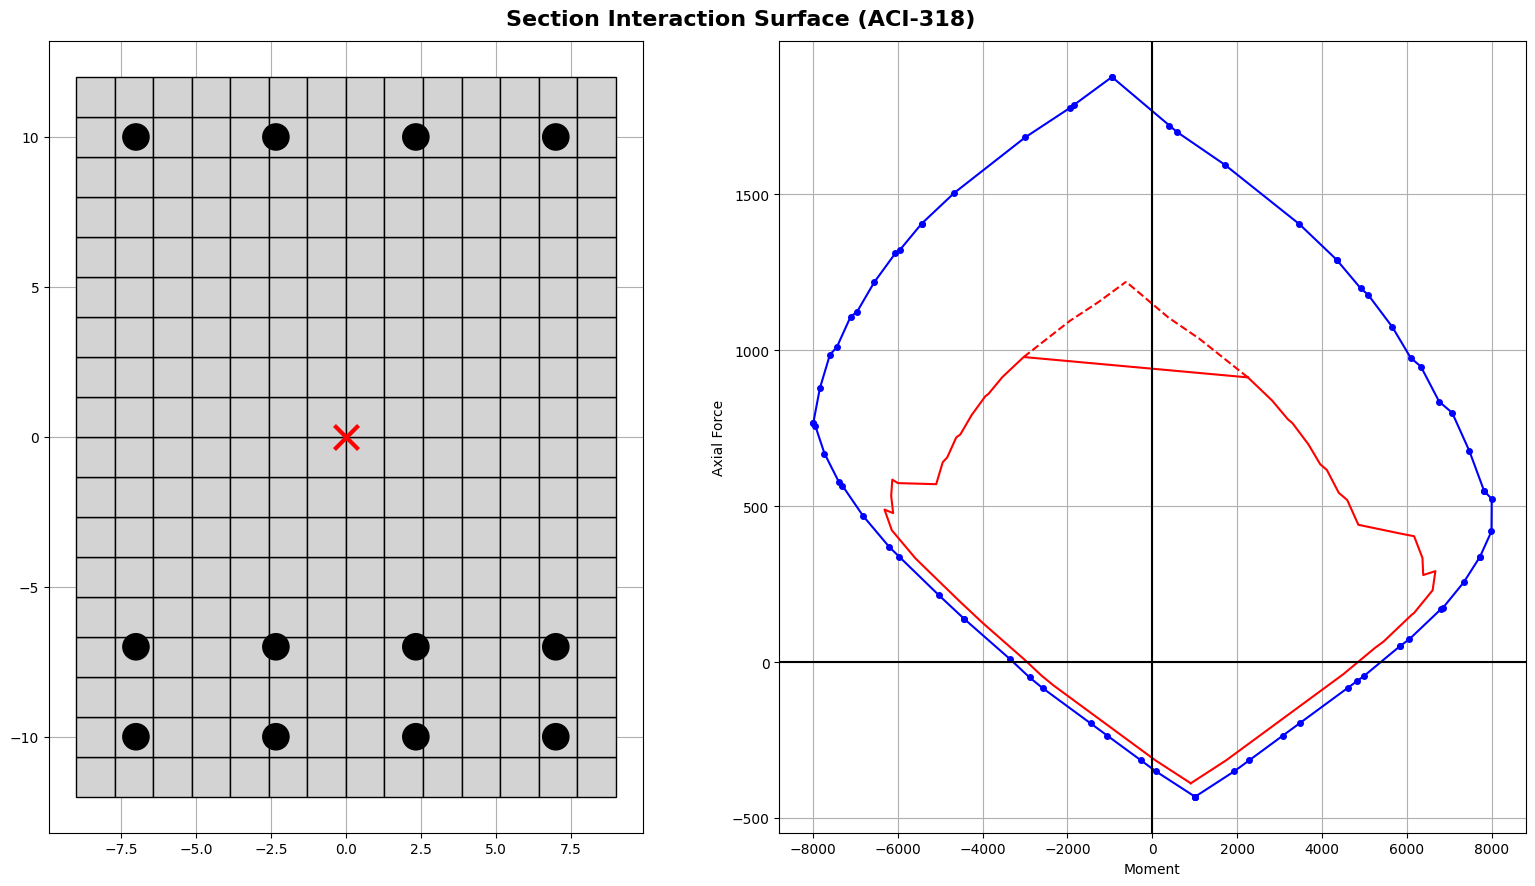

In [17]:
fig = fkit.plotter.plot_PM(section1)

## Step 5: Export data

In [18]:
section1.export_data()

Results to be exported to folder: C:\Users\wcfro\OneDrive\Documents\Python Scripts\jupyter_venv\exported_data_fkit
